In [1]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import module_path
import sys
#add modules to path
modules: str = module_path.add_module_path()
sys.path.append(modules)
import gate
import file_io
import simulation_setup as setup
import pulse
from pulse import Pulse
import composite_systems as systems
import state_labeling as lbl
from random import random

Make Custom Unitary

In [2]:
rng = np.random.default_rng()
global_phase = random()*2*np.pi
phi_00 = 0
phi_11 = random()*2*np.pi + phi_00
phi_22 = random()*2*np.pi + phi_00
phi_33 = np.pi + phi_00 + phi_11 + phi_22
test_diag = [np.exp(phi_00*1j), np.exp(phi_11*1j), np.exp(phi_22*1j), np.exp(1j*phi_33)]
U_test = qt.qdiags(test_diag, dims=[[2,2],[2,2]], offsets=0) * np.exp(1j*global_phase)
display(U_test)
U = gate._trivial_z_qs(U_test)
display(U)


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 0.15853947+0.98735264j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.97526206-0.22105185j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.65586337-0.75487962j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
  -0.45588513-0.89003862j]]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [3]:
[phi_00, phi_11, phi_22, phi_33]

[0, 6.130889113531649, 0.9350630415907968, 10.207544808712237]

In [4]:
zz = U_test[3,3]
zz *(U_test[0,0].conjugate()/abs(U_test[0,0])) * U_test[1,1].conjugate() * U_test[2,2].conjugate()

(-0.7249879021777037+0.6887616000445818j)

In [5]:
np.exp(1j*(phi_33 - (phi_00 + phi_11 + phi_22)))

(-1+1.8988215193149856e-15j)

In [6]:
U = U_test * (U_test[0,0].conjugate()/abs(U_test[0,0]))
triv_z_diag = [U[i,i].conjugate()/abs(U[i,i]) for i in range(3)]
triv_z_diag.append(U[1,1].conjugate()*U[2,2].conjugate()/(abs(U[1,1])*abs(U[2,2])))
triv_z = (U_test[0,0].conjugate()/abs(U_test[0,0])) * qt.qdiags(triv_z_diag, offsets=0, dims=[[2,2],[2,2]])
triv_z * U_test

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0. -1.]]

In [7]:
ang = np.angle
ang(U[3,3]) - ang(U[2,2]) - ang(U[1,1])

-3.1415926535897944

In [8]:
np.exp(1j*3.357112111270943)

(-0.976865437439626-0.21385489738579366j)

In [9]:
ang(U_test[3,3])

1.1626565965779165

In [10]:
sum([ang(U_test[i,i]) for i in range(3)]) + np.pi

-4.36074921333155

In [11]:
U_test

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[-0.92870552-0.37081808j  0.        +0.j          0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j         -0.97421219-0.22563379j  0.        +0.j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j         -0.25306158-0.96745017j
   0.        +0.j        ]
 [ 0.        +0.j          0.        +0.j          0.        +0.j
   0.39690255+0.91786076j]]

In [12]:
ang(U[0,0])

0.0

In [3]:
configs = setup.setup_sim_from_configs(pulse_lbls=['CZ-400ns'])
pulse_profile = configs[1]['CZ-400ns']


In [4]:
pulse_params = pulse_profile.pulse_config.pulse_params
ct = pulse_profile.circuit

static_attr = pulse.StaticPulseAttr(pulse_params, ct)

en_ee0 = static_attr.eigenen('ee0')
en_ge1 = static_attr.eigenen('ge1')
en_gf0 = static_attr.eigenen('gf0')

sim_trans_freq = {'w_ee0_ge1': (en_ge1 - en_ee0)/(2*np.pi),
                  'w_gf0_ge1': (en_ge1 - en_gf0)/(2*np.pi)}
paper_trans_freq = {'w_ee0_ge1': -0.84,
                    'w_gf0_ge1': -2.43}

display(sim_trans_freq)
display(paper_trans_freq)

{'w_ee0_ge1': -0.841234587561601, 'w_gf0_ge1': -2.42927705886077}

{'w_ee0_ge1': -0.84, 'w_gf0_ge1': -2.43}

In [5]:
pulse = Pulse(pulse_params, ct)
tg = pulse_profile.pulse_config.pulse_params['tg']
dt = pulse_profile.pulse_config.pulse_params['dt']
t_ramp = pulse_profile.pulse_config.pulse_params['t_ramp']
tlist = np.arange(0, tg + 2 * t_ramp, dt)
tlist = tlist[::100]
gs = pulse._Pulse__g_ac(tlist, np.pi)

/tmp/ipykernel_96762/3943748215.py:15: ComplexWarning: Casting complex values to real discards the imaginary part
  detuning_arr['A'][i] = w_A - deltas['A'][i]
/tmp/ipykernel_96762/3943748215.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  detuning_arr['B'][i] = w_B - deltas['B'][i]


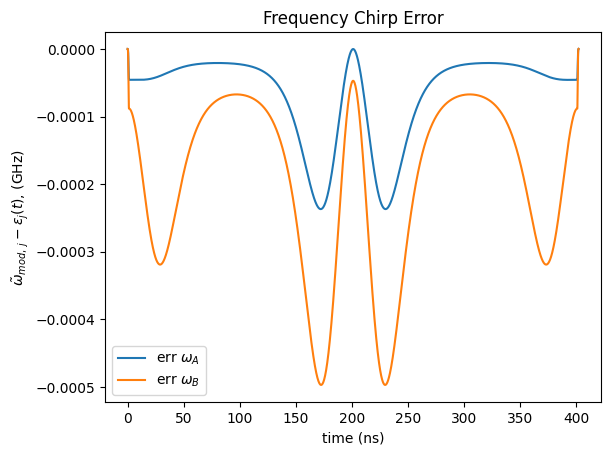

In [6]:
deltas = pulse._Pulse__w_mod(gs)
n: qt.Qobj = ct.get_raised_op('C', ['a'],
                     lambda a: a.dag()*a)
pulse_arr = pulse_profile.pulse
pulse_arr = pulse_arr[::100]

detuning_arr = {'A': np.empty(len(pulse_arr)),
               'B': np.empty(len(pulse_arr))}
for i, p in enumerate(pulse_arr):
    H_eff = ct.H + p*n
    energies = H_eff.eigenenergies()
    energies = energies-energies[0]
    w_A = pulse.static_attr.eigenen('ge1') - pulse.static_attr.eigenen('ee0')
    w_B = pulse.static_attr.eigenen('ge1') - pulse.static_attr.eigenen('gf0')
    detuning_arr['A'][i] = w_A - deltas['A'][i]
    detuning_arr['B'][i] = w_B - deltas['B'][i]


   

fig_det, ax_det = plt.subplots()
ax_det.plot(tlist, detuning_arr['A'], label=r'err $\omega_A$')
ax_det.plot(tlist, detuning_arr['B'], label=r'err $\omega_B$')
ax_det.set_ylabel(r'$\tilde \omega_{mod, \; j} - \epsilon_j(t)$, (GHz)')
ax_det.set_xlabel(r'time (ns)')
ax_det.set_title('Frequency Chirp Error')
ax_det.legend()
plt.show()
    
    

In [7]:
H = ct.H

eigenens = H.eigenenergies()
eigenens -= eigenens[0]

e00, e11, e01, e10 = [
    eigenens[pulse.static_attr.state_idx(lbl)]
    for lbl in ('ggg', 'eeg', 'geg', 'egg')
]

zz = e11 + e00 - e01 -e10

In [8]:
zz*1e6/(2*np.pi)

-11.809261759126716

In [9]:
ee0, ge1, gf0, gg1, eg0, ge0 = [
    eigenens[pulse.static_attr.state_idx(lbl)]
    for lbl in ('ee0','ge1','gf0','gg1', 'eg0','ge0')]
(abs(gf0-ge1) - abs(eg0-gg1))/(2*np.pi)

2.43 - 0.71

1.7200000000000002

In [10]:
A = ct.subsystems['A']
B = ct.subsystems['B']
eigenensA = A.H.eigenenergies()
eigenensB = B.H.eigenenergies()
w_A = eigenensA[1] - eigenensA[0]
w_B = eigenensB[1] - eigenensB[0]

In [11]:
display(w_A/(2*np.pi), w_B/(2*np.pi))

1.7931645407874008

0.8617981083845541

In [12]:
a = ct.get_raised_op('C', 'a')
n = a.dag()*a
n = n.transform(ct.H.eigenstates()[1])
for k, l in [('eg0','gg1'), ('ge0', 'gg1')]:
    kidx = pulse.static_attr.state_idx(k)
    lidx = pulse.static_attr.state_idx(l)
    print('k:', k, 'l:', l, '<k|a.dag()a|l>', n[kidx,lidx])
    
    

k: eg0 l: gg1 <k|a.dag()a|l> (0.18069260493411043-0.0011079171744717805j)
k: ge0 l: gg1 <k|a.dag()a|l> (0.3658695343054887+0.0018707404366632117j)


In [23]:
for state in ('ggg', 'egg','geg','eeg','gg1','gf0', 'ge1'):
    print(pulse.static_attr.state_idx(state))

0
4
1
6
2
13
3


(<Figure size 800x600 with 2 Axes>, <Axes: >)

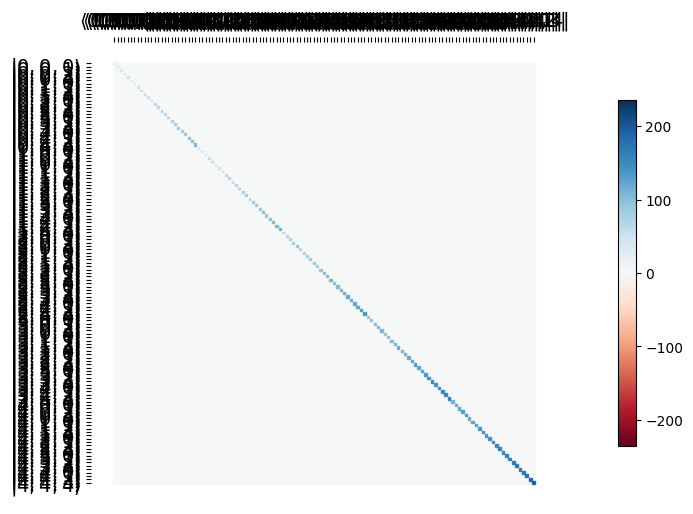

In [27]:
ct.H
qt.hinton(ct.H)

In [28]:
ct.H


Quantum object: dims = [[5, 5, 5], [5, 5, 5]], shape = (125, 125), type = oper, isherm = True
Qobj data =
[[ 36.5970862 +0.j   0.        +0.j   0.        +0.j ...   0.        +0.j
    0.        +0.j   0.        +0.j]
 [  0.        +0.j  43.57142189+0.j   0.        +0.j ...   0.        +0.j
    0.        +0.j   0.        +0.j]
 [  0.        +0.j   0.        +0.j  50.48292573+0.j ...   0.        +0.j
    0.        +0.j   0.        +0.j]
 ...
 [  0.        +0.j   0.        +0.j   0.        +0.j ... 222.32680812+0.j
    0.        +0.j   0.        +0.j]
 [  0.        +0.j   0.        +0.j   0.        +0.j ...   0.        +0.j
  229.17548011+0.j   0.        +0.j]
 [  0.        +0.j   0.        +0.j   0.        +0.j ...   0.        +0.j
    0.        +0.j 235.96132024+0.j]]

In [31]:
ct.H.extract_states(list(range(38)))

Quantum object: dims = [[38], [38]], shape = (38, 38), type = oper, isherm = True
Qobj data =
[[36.5970862 +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j 43.57142189+0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j 50.48292573+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [ 0.        +0.j  0.        +0.j  0.        +0.j ... 74.04423532+0.j
   0.        +0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
  81.01857101+0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.        +0.j ...  0.        +0.j
   0.        +0.j 87.93007485+0.j]]

In [32]:
Hd = ct.H.transform(ct.H.eigenstates()[1])

In [34]:
Hd.extract_states(list(range(38)))

Quantum object: dims = [[38], [38]], shape = (38, 38), type = oper, isherm = True
Qobj data =
[[ 3.64677009e+01+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   0.00000000e+00+0.j  0.00000000e+00+0.j  8.78563039e-12+0.j]
 [ 0.00000000e+00+0.j  4.14393095e+01+0.j  0.00000000e+00+0.j ...
  -1.03501402e-12+0.j  2.87258477e-12+0.j  0.00000000e+00+0.j]
 [ 0.00000000e+00+0.j  0.00000000e+00+0.j  4.34075872e+01+0.j ...
  -1.95723347e-12+0.j  8.46810642e-12+0.j  0.00000000e+00+0.j]
 ...
 [ 0.00000000e+00+0.j -1.03501501e-12+0.j -1.95723674e-12+0.j ...
   9.27137365e+01+0.j  0.00000000e+00+0.j  1.25329409e-11+0.j]
 [ 0.00000000e+00+0.j  2.87258528e-12+0.j  8.46810805e-12+0.j ...
   0.00000000e+00+0.j  9.35463037e+01+0.j -4.96591670e-11+0.j]
 [ 8.78564564e-12+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
   1.25329446e-11+0.j -4.96591671e-11+0.j  9.44640273e+01+0.j]]

In [35]:
Hd


Quantum object: dims = [[5, 5, 5], [5, 5, 5]], shape = (125, 125), type = oper, isherm = True
Qobj data =
[[ 3.64677009e+01+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  4.14393095e+01+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+1.34450108e-12j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   4.34075872e+01+0.00000000e+00j ...  0.00000000e+00+0.00000000e+00j
   0.00000000e+00-1.16797496e-11j  0.00000000e+00+0.00000000e+00j]
 ...
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00+0.00000000e+00j
   0.00000000e+00+0.00000000e+00j ...  2.26208578e+02+0.00000000e+00j
  -7.55981277e-11+0.00000000e+00j  0.00000000e+00+0.00000000e+00j]
 [ 0.00000000e+00+0.00000000e+00j  0.00000000e+00-1.34450108e-12j
   0.000000

In [1]:
qt.simgaz()

NameError: name 'qt' is not defined

In [2]:
import qutip as qt

In [3]:
qt.sigmaz()

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.  0.]
 [ 0. -1.]]

In [5]:
qt.tensor(qt.sigmaz(), qt.sigmaz())

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 1.  0.  0.  0.]
 [ 0. -1.  0.  0.]
 [ 0.  0. -1.  0.]
 [ 0.  0.  0.  1.]]

In [7]:
import numpy as np
(-1j*qt.tensor(qt.sigmaz(), qt.sigmaz())).expm()

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[0.54030231-0.84147098j 0.        +0.j         0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.54030231+0.84147098j 0.        +0.j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.54030231+0.84147098j
  0.        +0.j        ]
 [0.        +0.j         0.        +0.j         0.        +0.j
  0.54030231-0.84147098j]]

In [10]:
(-1j*qt.tensor(qt.sigmaz(), qt.sigmaz())).expm()*np.exp(-1j*np.angle(0.54 - 0.841j))

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = False
Qobj data =
[[ 1.        -9.26129901e-08j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j -0.41614675+9.09297465e-01j
   0.        +0.00000000e+00j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
  -0.41614675+9.09297465e-01j  0.        +0.00000000e+00j]
 [ 0.        +0.00000000e+00j  0.        +0.00000000e+00j
   0.        +0.00000000e+00j  1.        -9.26129901e-08j]]